In [1]:
# Dependencies
import requests
from pprint import pprint
import json
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Vic.gov API Key
from config import vic_key

# Google API Key
from config import gkey
import gmaps
# Configure gmaps
gmaps.configure(api_key=gkey)


url = "https://api.vic.gov.au:443/abs/v1.0/labour-force-statistics?"

In [2]:
# Set parameters to pass with the url
params = {
'data_item': "UNEMPLOYMENT_RATE",
'age': "15_AND_OVER",
'start_period': "2019-01",
'end_period': "2020-12"
}

In [3]:
# Set the header that contains the apikey
headers = {
  "Content-Type": "application/json",
  "Accept": "application/json",
  "apikey": vic_key
}

In [4]:
# Set up list with all the states to loop through to extract the data by state
states = ['NEW_SOUTH_WALES', 'VICTORIA', 'QUEENSLAND', 'SOUTH_AUSTRALIA', 'WESTERN_AUSTRALIA', 
          'TASMANIA', 'NORTHERN_TERRITORY', 'AUSTRALIAN_CAPITAL_TERRITORY']

# Set up an empty list to store the output of the response
data = []

In [5]:
for state in states:
    # create and update region key value of params
    params['region'] = f"{state}"
    # Request data and convert the response to JSON
    response = requests.get(url, headers = headers, params = params).json()
    # Appends the response[labour_force_statistics] key into the empty list
    data.append(response['labour_force_statistics'])
    #Printing progress
    print(f"Retrieving data from {state}")
    
print('Data retrieval completed')

Retrieving data from NEW_SOUTH_WALES
Retrieving data from VICTORIA
Retrieving data from QUEENSLAND
Retrieving data from SOUTH_AUSTRALIA
Retrieving data from WESTERN_AUSTRALIA
Retrieving data from TASMANIA
Retrieving data from NORTHERN_TERRITORY
Retrieving data from AUSTRALIAN_CAPITAL_TERRITORY
Data retrieval completed


In [6]:
# Sets the length of the data to a variable to loop through
len_data = len(data)
# Define an empty list that will containe each state data converted to a dataframe
state_data = []

# Loops from 0 to length of data (=8 items in the list containing data per each state)
for i in range(0,len_data):
    # Converts each data[index] to a dataframe and appends it into a list of dataframes
    state_data.append(pd.DataFrame(data[i]))
    
# Outside the loop, concatenate each dataframe of the list into a complete dataframe   
unemployment_states_df = pd.concat(state_data)
unemployment_states_df

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value
0,New South Wales,Unemployment rate (%),Males,15 and over,Original,2019-01,4.5477303
1,New South Wales,Unemployment rate (%),Males,15 and over,Original,2019-02,4.6069468
2,New South Wales,Unemployment rate (%),Males,15 and over,Original,2019-03,4.5136357
3,New South Wales,Unemployment rate (%),Males,15 and over,Original,2019-04,4.1855449
4,New South Wales,Unemployment rate (%),Males,15 and over,Original,2019-05,4.4639015
...,...,...,...,...,...,...,...
211,Australian Capital Territory,Unemployment rate (%),Persons,15 and over,Trend,2020-08,NaN
212,Australian Capital Territory,Unemployment rate (%),Persons,15 and over,Trend,2020-09,NaN
213,Australian Capital Territory,Unemployment rate (%),Persons,15 and over,Trend,2020-10,NaN
214,Australian Capital Territory,Unemployment rate (%),Persons,15 and over,Trend,2020-11,NaN


In [7]:
# Edit the dataframe to keep only relevant values
# Filter the data to keep only valid values
unemployment_states_df = unemployment_states_df[unemployment_states_df.observation_value != 'NaN']
# Filter the data to keep only persons
unemployment_states_df = unemployment_states_df[unemployment_states_df.sex_description == 'Persons']
# Filter the data to keep only original
unemployment_states_df = unemployment_states_df[unemployment_states_df.adjustment_type_description == 'Original']
# Convert the observation_value column to float
unemployment_states_df.observation_value = unemployment_states_df.observation_value.astype(float)

In [8]:
unemployment_states_df[['year','month']] = unemployment_states_df['observation_month'].str.split('-',expand=True)
unemployment_states_df

,region_description,data_item_description,sex_description,age_description,adjustment_type_description,observation_month,observation_value,year,month
144,New South Wales,Unemployment rate (%),Persons,15 and over,Original,2019-01,4.257761,2019,01
145,New South Wales,Unemployment rate (%),Persons,15 and over,Original,2019-02,4.640529,2019,02
146,New South Wales,Unemployment rate (%),Persons,15 and over,Original,2019-03,4.600787,2019,03
147,New South Wales,Unemployment rate (%),Persons,15 and over,Original,2019-04,4.506902,2019,04
148,New South Wales,Unemployment rate (%),Persons,15 and over,Original,2019-05,4.528636,2019,05
...,...,...,...,...,...,...,...,...,...
163,Australian Capital Territory,Unemployment rate (%),Persons,15 and over,Original,2020-08,4.274463,2020,08
164,Australian Capital Territory,Unemployment rate (%),Persons,15 and over,Original,2020-09,3.795598,2020,09
165,Australian Capital Territory,Unemployment rate (%),Persons,15 and over,Original,2020-10,3.687295,2020,10
166,Australian Capital Territory,Unemployment rate (%),Persons,15 and over,Original,2020-11,3.618658,2020,11


In [9]:
reduced_unemployment_states_df = unemployment_states_df[['region_description','observation_value','year']]
reduced_unemployment_states_df

,region_description,observation_value,year
144,New South Wales,4.257761,2019
145,New South Wales,4.640529,2019
146,New South Wales,4.600787,2019
147,New South Wales,4.506902,2019
148,New South Wales,4.528636,2019
...,...,...,...
163,Australian Capital Territory,4.274463,2020
164,Australian Capital Territory,3.795598,2020
165,Australian Capital Territory,3.687295,2020
166,Australian Capital Territory,3.618658,2020


In [10]:
reduced_unemployment_states_2019_df = reduced_unemployment_states_df[reduced_unemployment_states_df.year == '2019'].reset_index()
reduced_unemployment_states_2020_df = reduced_unemployment_states_df[reduced_unemployment_states_df.year == '2020'].reset_index()
merged = pd.merge(reduced_unemployment_states_2019_df, reduced_unemployment_states_2020_df, on='region_description', how='outer')
merged = merged[['region_description','observation_value_x','observation_value_y']]
merged.columns = ['region_description','unemployment_2019','unemployment_2020']
merged

,region_description,unemployment_2019,unemployment_2020
0,New South Wales,4.257761,4.794007
1,New South Wales,4.257761,4.944697
2,New South Wales,4.257761,5.124056
3,New South Wales,4.257761,6.274630
4,New South Wales,4.257761,6.319360
...,...,...,...
1147,Australian Capital Territory,2.805164,4.274463
1148,Australian Capital Territory,2.805164,3.795598
1149,Australian Capital Territory,2.805164,3.687295
1150,Australian Capital Territory,2.805164,3.618658


In [11]:
grouped = merged.groupby('region_description').mean()
grouped

,unemployment_2019,unemployment_2020
region_description,,
Australian Capital Territory,3.427932,3.771817
New South Wales,4.450620,6.092661
Northern Territory,4.994466,5.642244
Queensland,6.145859,7.157342
South Australia,6.242060,6.936954
Tasmania,6.325434,6.455898
Victoria,4.727551,6.416068
Western Australia,5.907712,6.647121


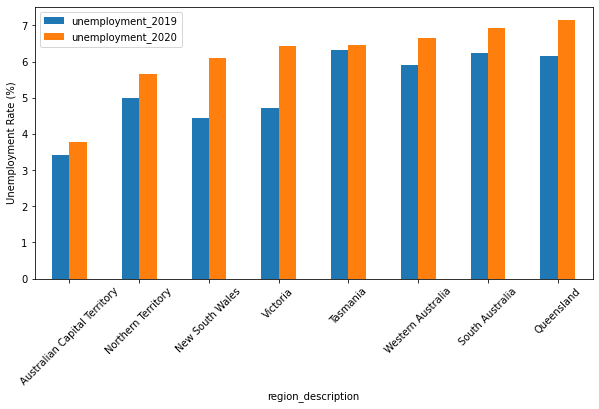

In [12]:
grouped.sort_values(by = 'unemployment_2020', ascending=True).plot(kind='bar', figsize=(10, 5), ylabel = 'Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.savefig('Unemployment Rate by state.png')

In [13]:
states = merged['region_description'].unique()
states

array(['New South Wales', 'Victoria', 'Queensland', 'South Australia',
       'Western Australia', 'Tasmania', 'Northern Territory',
       'Australian Capital Territory'], dtype=object)

In [14]:
data_dict = {"states": [],
            "unemp_2019": [],
            "unemp_2020": []}

for state in states:
    if state not in data_dict['states']:
        data_dict['states'].append(state)
    data_dict['unemp_2019'].append(merged[merged.region_description == f'{state}']['unemployment_2019'])
    data_dict['unemp_2020'].append(merged[merged.region_description == f'{state}']['unemployment_2020'])

data_dict

{'states': ['New South Wales',
  'Victoria',
  'Queensland',
  'South Australia',
  'Western Australia',
  'Tasmania',
  'Northern Territory',
  'Australian Capital Territory'],
 'unemp_2019': [0      4.257761
  1      4.257761
  2      4.257761
  3      4.257761
  4      4.257761
           ...   
  139    4.357354
  140    4.357354
  141    4.357354
  142    4.357354
  143    4.357354
  Name: unemployment_2019, Length: 144, dtype: float64,
  144    5.002987
  145    5.002987
  146    5.002987
  147    5.002987
  148    5.002987
           ...   
  283    4.742238
  284    4.742238
  285    4.742238
  286    4.742238
  287    4.742238
  Name: unemployment_2019, Length: 144, dtype: float64,
  288    6.452011
  289    6.452011
  290    6.452011
  291    6.452011
  292    6.452011
           ...   
  427    5.254380
  428    5.254380
  429    5.254380
  430    5.254380
  431    5.254380
  Name: unemployment_2019, Length: 144, dtype: float64,
  432    6.788771
  433    6.788771
  434    6

In [15]:
# Calculate Independent (Two Sample) T-Test for each region between 2019 and 2020
NSW_stats = stats.ttest_ind(data_dict['unemp_2019'][0], data_dict['unemp_2020'][0], equal_var=False)
print(f' Stats for NSW comparing 2019 with 2020: {NSW_stats}')
VIC_stats = stats.ttest_ind(data_dict['unemp_2019'][1], data_dict['unemp_2020'][1], equal_var=False)
print(f' Stats for VIC comparing 2019 with 2020: {VIC_stats}')
QLD_stats = stats.ttest_ind(data_dict['unemp_2019'][2], data_dict['unemp_2020'][2], equal_var=False)
print(f' Stats for QLD comparing 2019 with 2020: {QLD_stats}')
SA_stats = stats.ttest_ind(data_dict['unemp_2019'][3], data_dict['unemp_2020'][3], equal_var=False)
print(f' Stats for SA comparing 2019 with 2020: {SA_stats}')
WA_stats = stats.ttest_ind(data_dict['unemp_2019'][4], data_dict['unemp_2020'][4], equal_var=False)
print(f' Stats for WA comparing 2019 with 2020: {WA_stats}')
TAS_stats = stats.ttest_ind(data_dict['unemp_2019'][5], data_dict['unemp_2020'][5], equal_var=False)
print(f' Stats for TAS comparing 2019 with 2020: {TAS_stats}')
NT_stats = stats.ttest_ind(data_dict['unemp_2019'][6], data_dict['unemp_2020'][6], equal_var=False)
print(f' Stats for NT comparing 2019 with 2020: {NT_stats}')
ACT_stats = stats.ttest_ind(data_dict['unemp_2019'][7], data_dict['unemp_2020'][7], equal_var=False)
print(f' Stats for ACT comparing 2019 with 2020: {ACT_stats}')

 Stats for NSW comparing 2019 with 2020: Ttest_indResult(statistic=-26.74576886332865, pvalue=1.583864318940753e-59)
 Stats for VIC comparing 2019 with 2020: Ttest_indResult(statistic=-34.88177884645545, pvalue=9.133484525260643e-89)
 Stats for QLD comparing 2019 with 2020: Ttest_indResult(statistic=-15.377102287999907, pvalue=7.522505772160083e-37)
 Stats for SA comparing 2019 with 2020: Ttest_indResult(statistic=-9.263801370556834, pvalue=1.5869296982225977e-17)
 Stats for WA comparing 2019 with 2020: Ttest_indResult(statistic=-8.94927128032161, pvalue=6.118559827761348e-17)
 Stats for TAS comparing 2019 with 2020: Ttest_indResult(statistic=-1.6247231022104849, pvalue=0.1054286346462504)
 Stats for NT comparing 2019 with 2020: Ttest_indResult(statistic=-7.821086035014011, pvalue=1.1975223708119574e-13)
 Stats for ACT comparing 2019 with 2020: Ttest_indResult(statistic=-5.390129998582801, pvalue=1.7526557449300228e-07)


Text(0.5, 0, 'States')

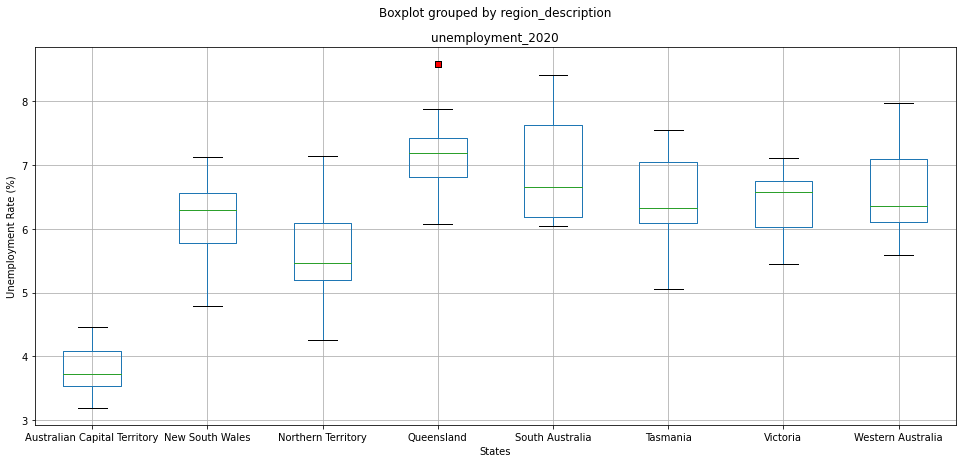

In [16]:
# Create a boxplot to compare means between states in 2020
red_square = dict(markerfacecolor='r', marker='s')
merged.boxplot("unemployment_2020", by="region_description", figsize=(16, 7), flierprops = red_square)
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('States')

In [17]:
# Perform the ANOVA
NSW = merged[merged.region_description == 'New South Wales']['unemployment_2020']
VIC = merged[merged.region_description == 'Victoria']['unemployment_2020']
QLD = merged[merged.region_description == 'Queensland']['unemployment_2020']
SA = merged[merged.region_description == 'South Australia']['unemployment_2020']
WA = merged[merged.region_description == 'Western Australia']['unemployment_2020']
TAS = merged[merged.region_description == 'Tasmania']['unemployment_2020']
NT = merged[merged.region_description == 'Northern Territory']['unemployment_2020']
ACT = merged[merged.region_description == 'Australian Capital Territory']['unemployment_2020']
stats.f_oneway(NSW, VIC, QLD, SA, WA, TAS, NT, ACT)

F_onewayResult(statistic=337.67957414534465, pvalue=4.077472496213792e-273)

In [18]:
grouped1 = grouped.reset_index()

# create a params dict that will be updated with new city each iteration
params = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in grouped1.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    state = row['region_description']
    country = 'Australia'

    # update address key value
    params['address'] = f"{state},{country}"

    # make request and convert to json
    states_lat_lng = requests.get(base_url, params=params).json()

    grouped1.loc[index, "Lat"] = states_lat_lng["results"][0]["geometry"]["location"]["lat"]
    grouped1.loc[index, "Lng"] = states_lat_lng["results"][0]["geometry"]["location"]["lng"]

grouped1

,region_description,unemployment_2019,unemployment_2020,Lat,Lng
0,Australian Capital Territory,3.427932,3.771817,-35.473468,149.012368
1,New South Wales,4.450620,6.092661,-31.253218,146.921099
2,Northern Territory,4.994466,5.642244,-19.491411,132.550960
3,Queensland,6.145859,7.157342,-20.917574,142.702796
4,South Australia,6.242060,6.936954,-30.000232,136.209155
5,Tasmania,6.325434,6.455898,-41.454520,145.970665
6,Victoria,4.727551,6.416068,-37.471308,144.785153
7,Western Australia,5.907712,6.647121,-27.672817,121.628310


In [19]:
# Store latitude and longitude in locations
locations = grouped1[["Lat", "Lng"]]

# Store unemployment means in a variable
unemp_avg = grouped1["unemployment_2020"]

# Plot Heatmap
fig = gmaps.figure(center = [-30,140] ,zoom_level = 4)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=unemp_avg, 
                                     dissipating=False,
                                     point_radius=3)

# Add layer
fig.add_layer(heat_layer)

# Display figure
print('Unemployment rate in 2020 by state')
fig

Unemployment rate in 2020 by state


Figure(layout=FigureLayout(height='420px'))

In [20]:
# Store latitude and longitude in locations
locations = grouped1[["Lat", "Lng"]]

# Store unemployment means in a variable
unemp_avg = grouped1["unemployment_2020"]

# Plot map
fig = gmaps.figure(center = [-30,140] ,zoom_level = 3.8)


# Create state polygons with graded colours according to unumployment rate in 2020

WA = gmaps.drawing_layer(features=[
     gmaps.Polygon([(-14.00, 126.82), (-19.47, 121.20), (-22.35, 113.81), (-33.94, 115.31), (-35.10, 117.07), (-31.57,129.11), (-15.02,128.93)], 
         fill_color='#ff8000'
     )
])

NT = gmaps.drawing_layer(features=[
     gmaps.Polygon([(-14.94, 129.02), (-25.95, 129.02), (-25.95, 137.90), (-16.55, 137.98), (-14.85, 135.35), (-11.95, 136.93), (-11.78, 132.62), (-14.94, 129.02)], 
         fill_color='#40ff00'
     )
])

QLD = gmaps.drawing_layer(features=[
     gmaps.Polygon([(-16.38, 138.07), (-25.95, 137.90), (-25.95, 141.06), (-28.92, 140.97), (-28.30, 153.10), (-24.92, 152.22), (-11.09, 142.47), (-17.64, 140.53), (-16.38, 138.07)], 
         fill_color='#ff0000'
     )
])

SA = gmaps.drawing_layer(features=[
     gmaps.Polygon([(-25.95, 129.11), (-31.57, 129.11), (-31.95, 133.68), (-34.95, 135.52), (-32.69, 137.8), (-38.06, 140.53), (-26.03, 140.88), (-25.95, 129.11)], 
         fill_color='#ff4000'
     )
])

NSW = gmaps.drawing_layer(features=[
     gmaps.Polygon([(-28.22, 153.45), (-28.92, 140.88), (-33.94, 140.71), (-37.50, 150.02), (-28.22, 153.45)], 
         fill_color='#ffff00'
     )
])

ACT = gmaps.drawing_layer(features=[
     gmaps.Polygon([(-35.09, 149.10), (-35.35, 148.69), (-35.93, 148.96), (-35.31, 149.42), (-35.09, 149.10)], 
         fill_color='#00ff00'
     )
])

VIC = gmaps.drawing_layer(features=[
     gmaps.Polygon([(-33.97, 140.66), (-38.03, 140.58), (-38.78, 143.56), (-37.78, 144.97), (-38.85, 146.20), (-37.47, 149.94), (-33.97, 140.66)], 
         fill_color='#ffbf00'
     )
])

TAS = gmaps.drawing_layer(features=[
     gmaps.Polygon([(-40.74, 148.05), (-41.11, 146.38), (-40.74, 144.66), (-43.48, 145.98), (-43.58, 146.86), (-42.74, 147.83), (-40.74, 148.05)], 
         fill_color='#ffbf00'
     )
])

# Add layer
fig.add_layer(WA)
fig.add_layer(NT)
fig.add_layer(QLD)
fig.add_layer(SA)
fig.add_layer(NSW)
fig.add_layer(ACT)
fig.add_layer(VIC)
fig.add_layer(TAS)

# Display figure
print('Unemployment rate in 2020 by state')
fig

Unemployment rate in 2020 by state


Figure(layout=FigureLayout(height='420px'))